### Build Dataset

In [15]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from utils.build_dataset import build_dataset

file_name = 'data_test.csv'
file_path = os.path.join('data', 'csv_positions', file_name)

dataset, x, y, dataframe = build_dataset(file_path, 50000, 32)

print(dataset.cardinality().numpy())
dataframe.describe()


1563


,eval
count,50000.000000
mean,10.446272
std,257.202991
min,-999.990000
25%,-0.990000
50%,0.060000
75%,1.510000
max,999.990000


In [16]:
from utils.build_dataset import split_dataset

train_dataset, test_dataset = split_dataset(dataset, 0.8)

### Import Model

In [17]:
import tensorflow as tf
from model.models import ChessModel

model = ChessModel(nb_filters=32, activation= 'tanh', input_shape=(8,8,6)).model

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 6, 6, 32)          1760      
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 2, 2, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 73697 (287.88 KB)
Trainable params: 7369

### Callbacks

In [6]:
import os
from utils.callback_setup import callback_setup

checkpoint_name = "test2/"
checkpoint_filepath = os.path.join('data', 'backup', checkpoint_name)

model_callbacks = callback_setup(checkpoint_filepath)



In [18]:
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=(test_dataset),
                    verbose=1,
                    callbacks=model_callbacks
                    )

Epoch 1/50


1250/1250 [==============================] - 6s 4ms/step - loss: 69.8717 - mae: 69.8717 - val_loss: 70.2614 - val_mae: 70.2614
Epoch 2/50
1250/1250 [==============================] - 6s 5ms/step - loss: 69.8605 - mae: 69.8605 - val_loss: 70.2620 - val_mae: 70.2620
Epoch 3/50
1250/1250 [==============================] - 8s 6ms/step - loss: 69.8611 - mae: 69.8611 - val_loss: 70.2622 - val_mae: 70.2622
Epoch 4/50
1250/1250 [==============================] - 6s 5ms/step - loss: 69.8614 - mae: 69.8614 - val_loss: 70.2633 - val_mae: 70.2633
Epoch 5/50
1250/1250 [==============================] - 6s 4ms/step - loss: 69.8606 - mae: 69.8606 - val_loss: 70.2636 - val_mae: 70.2636
Epoch 6/50
1250/1250 [==============================] - 6s 5ms/step - loss: 69.8607 - mae: 69.8607 - val_loss: 70.2626 - val_mae: 70.2626
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 69.8606 - mae: 69.8606 - val_loss: 70.2627 - val_mae: 70.2627
Epoch 8/50
1250/1250 [=======================

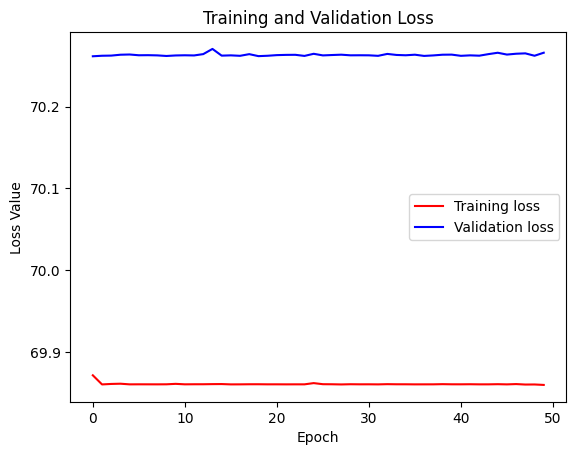

In [19]:
from utils.plot_loss import plot_loss
plot_loss(history.epoch, history.history["loss"], history.history["val_loss"])

In [20]:
from utils.converter import convert_fen_to_array
file_path = 'data/csv_positions/data_test.csv'
#load data
df = pd.read_csv(file_path)
df = df[10:20]

x_fen, y_eval = list(df['fen']), list(df['eval'])
input_tensor = tf.convert_to_tensor(list(df['fen'].map(convert_fen_to_array).to_numpy()))

print('y_eval:',y_eval)

output_tensor = model.predict(input_tensor)
# print(input_tensor)
print(output_tensor)

y_eval: [-0.06, 0.4, -0.34, 0.36, -0.43, 0.36, 0.0, 0.16, -0.06, 0.38]
1/1 [==============================] - 0s 68ms/step
[[0.23810364]
 [0.23810358]
 [0.23810308]
 [0.23810287]
 [0.2381031 ]
 [0.23810305]
 [0.23809783]
 [0.2380995 ]
 [0.23810323]
 [0.23810314]]


In [10]:
import os
checkpoint_name = "test/"
checkpoint_filepath = os.path.join('data', 'backup', checkpoint_name)
if os.path.exists(checkpoint_filepath):
    print('load model')
    model.load_weights(checkpoint_filepath)